In [1]:
import os

import numpy as np
np.set_printoptions(precision=2)
import torch
import matplotlib.pyplot as plt

from bmadx import Particle
from bmadx.plot import plot_projections

from stats import (
    read_all_particles,
    show_cov_stats,
    plot_projections_with_contours
)

In [2]:
dr = os.path.join('data', 'gaussian_beam', 'stats_t')

In [3]:
gt = torch.load(os.path.join(dr, 'gaussian_beam.pt')).numpy_particles()

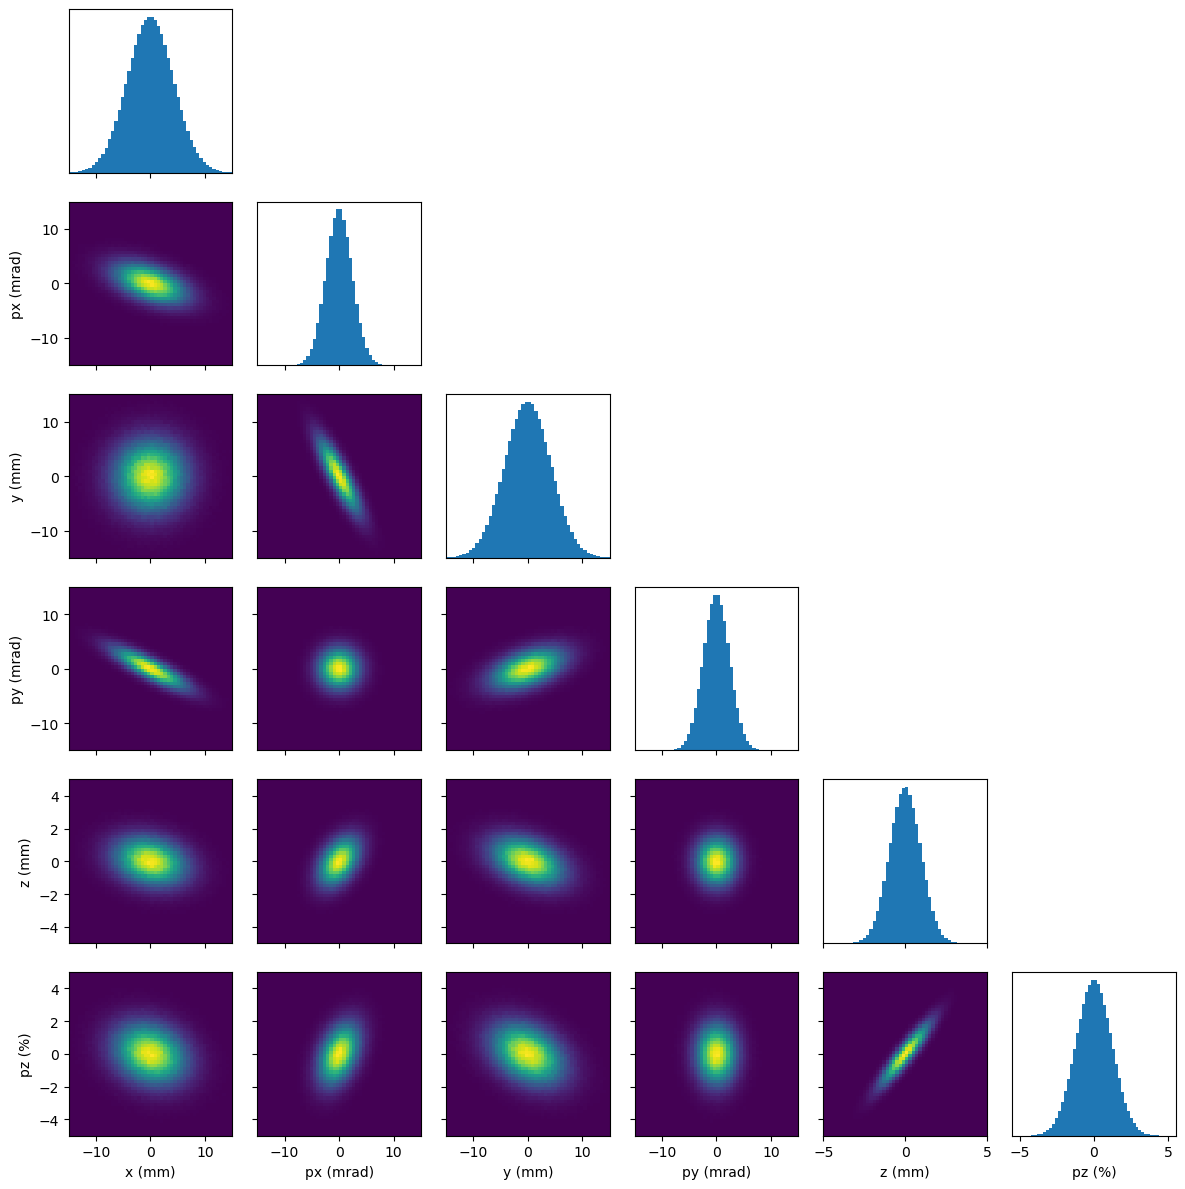

In [4]:
# plot gt:
lims = np.array([
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-5e-3,5e-3],
    [-5e-2,5e-2]
])
plot_projections(gt, custom_lims=lims)
plt.show()

In [5]:
n_beams = 100
n_par = 100_000

pars = read_all_particles(
    dr = dr,
    n_beams = n_beams, 
    n_par = n_par
)

In [6]:
par_concat = np.swapaxes(pars, 0, 1).reshape((6, n_par*n_beams))

In [7]:
r_avg = Particle(
    *par_concat,
    p0c = gt.p0c,
    s = gt.s,
    mc2 = gt.mc2
)

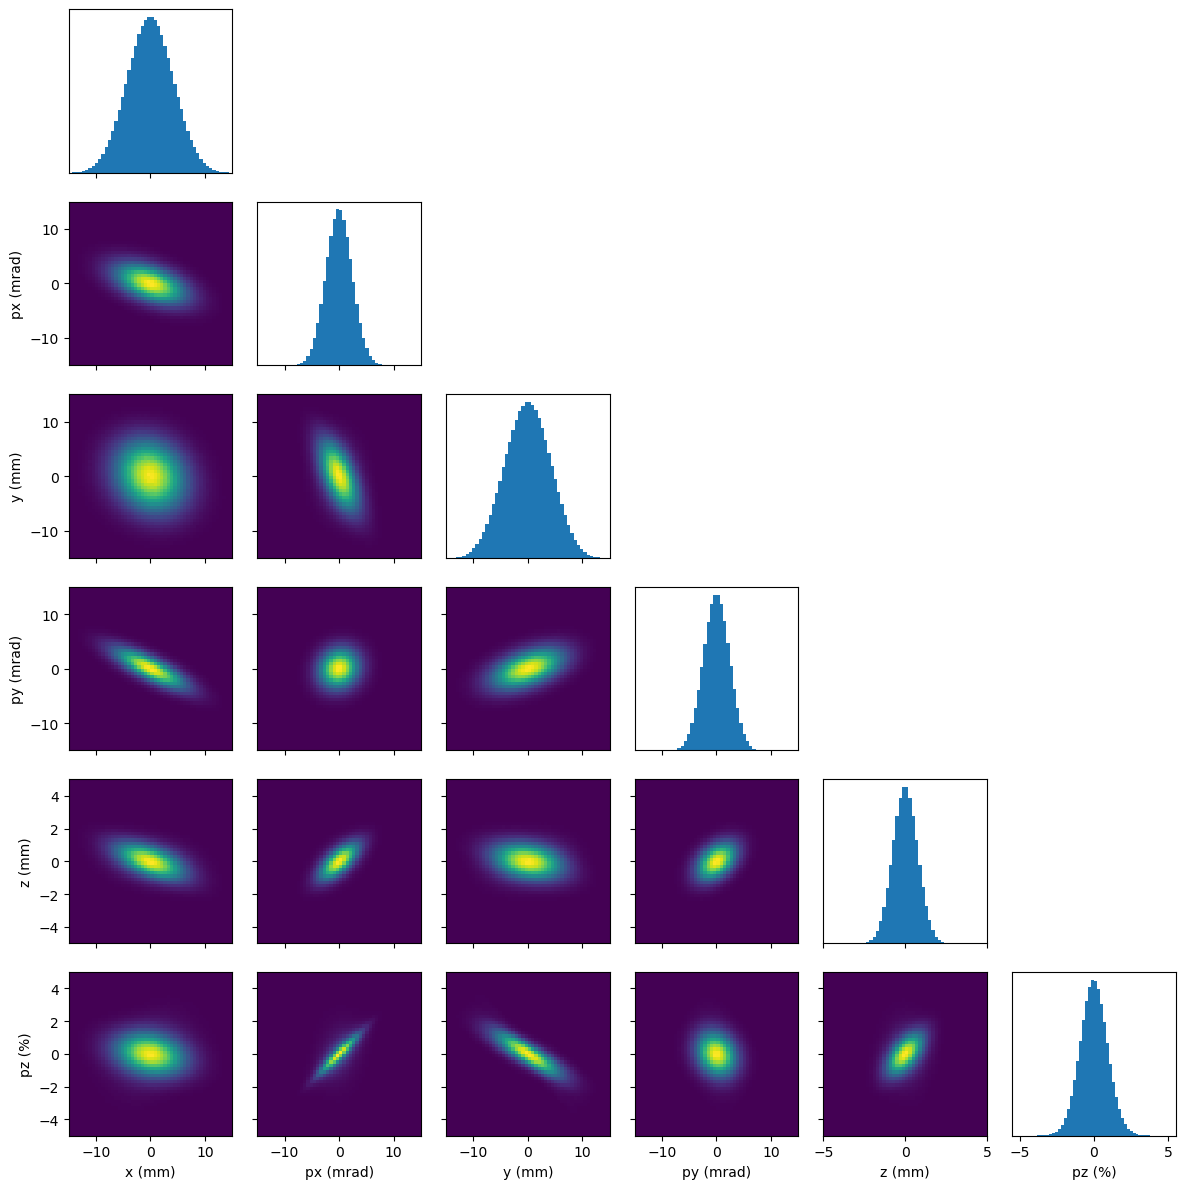

In [8]:
plot_projections(r_avg, custom_lims=lims)
plt.show()

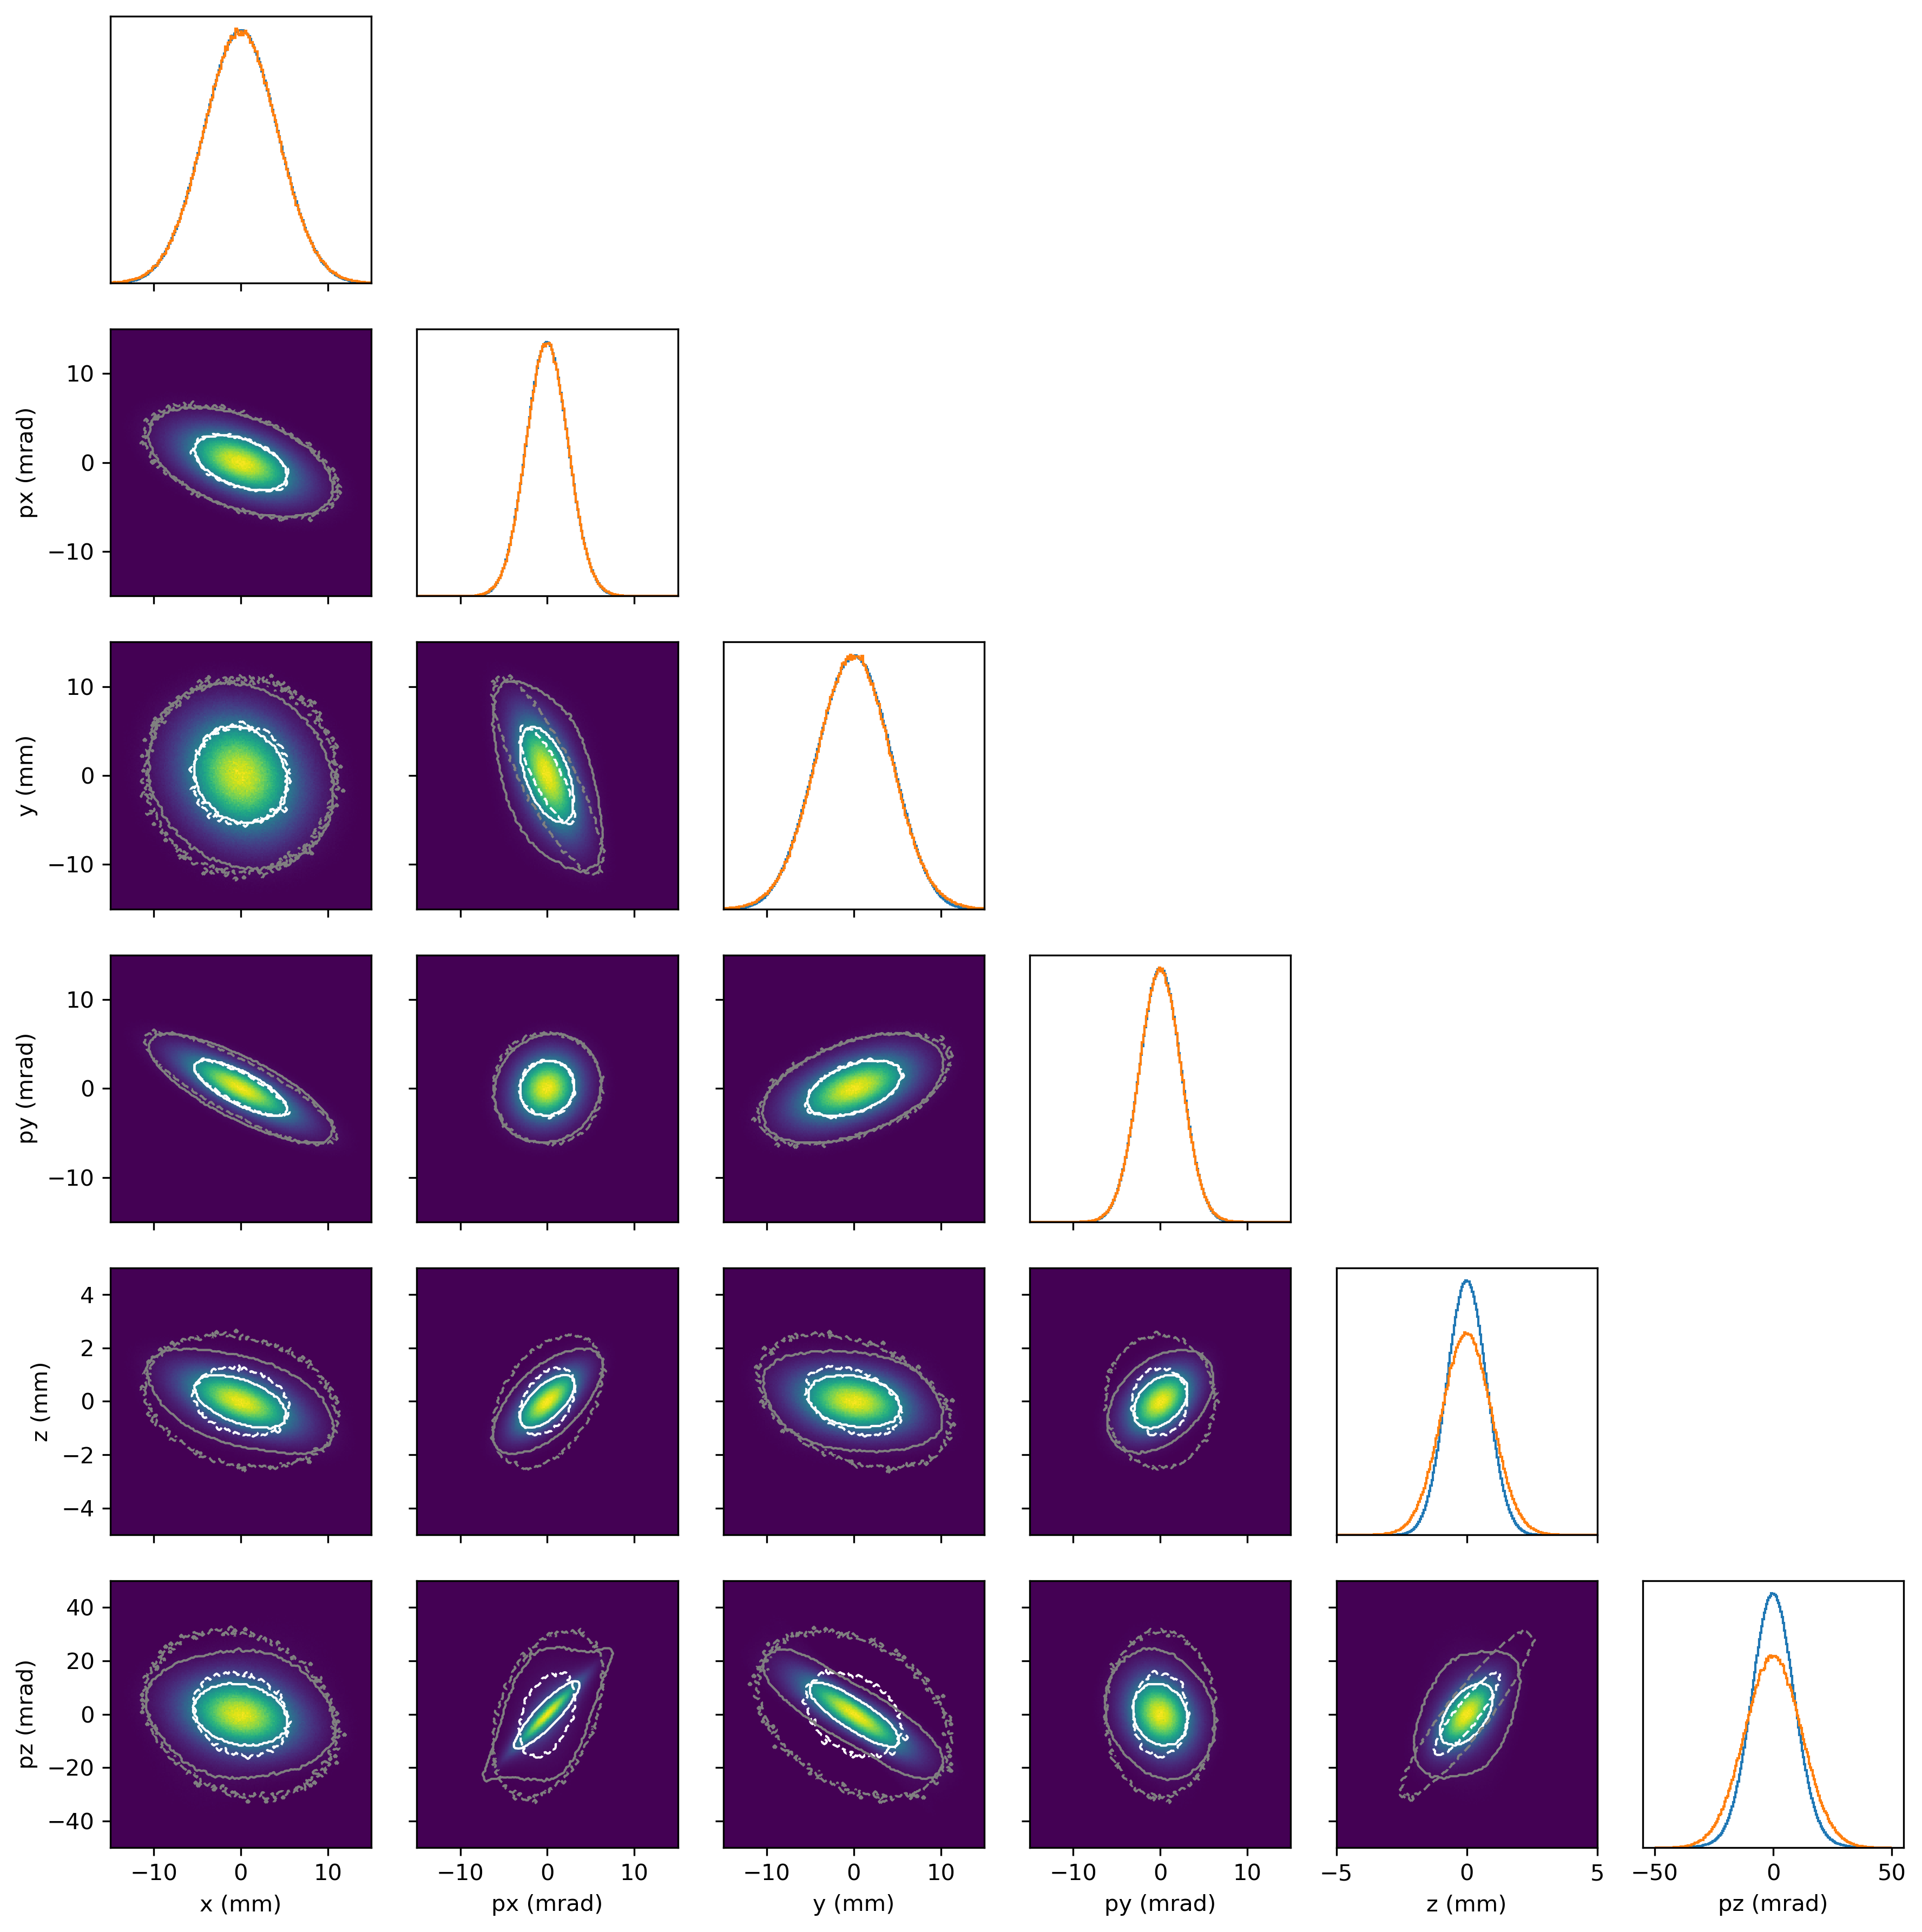

In [9]:
plot_projections_with_contours(
    r_avg,
    gt,
    bins=200,
    contour_percentiles = [50, 95],
    custom_lims=lims,
    contour_smoothing_r=0.5,
    contour_smoothing_gt=0.5
)
plt.show()

ground truth: 
[[ 1.01e+01 -2.79e+00 -1.62e-02 -4.85e+00 -4.89e-01 -5.65e+00]
 [-2.79e+00  3.23e+00 -4.85e+00 -4.42e-03  5.47e-01  6.31e+00]
 [-1.62e-02 -4.85e+00  1.01e+01  2.81e+00 -8.53e-01 -9.85e+00]
 [-4.85e+00 -4.42e-03  2.81e+00  3.24e+00 -1.56e-03 -1.73e-02]
 [-4.89e-01  5.47e-01 -8.53e-01 -1.56e-03  5.11e-01  5.89e+00]
 [-5.65e+00  6.31e+00 -9.85e+00 -1.73e-02  5.89e+00  7.98e+01]]

reconstruction avg: 
[[ 10.4   -2.89  -1.73  -4.66  -0.92  -2.25]
 [ -2.89   3.35  -2.9    0.36   0.71   8.22]
 [ -1.73  -2.9   10.61   2.99  -0.36 -20.32]
 [ -4.66   0.36   2.99   3.38   0.45  -2.77]
 [ -0.92   0.71  -0.36   0.45   0.35   1.65]
 [ -2.25   8.22 -20.32  -2.77   1.65  53.92]]

reconstruction std: 
[[ 0.56  0.27  1.18  0.43  0.42  6.22]
 [ 0.27  0.17  1.53  0.3   0.13  3.99]
 [ 1.18  1.53  0.75  0.3   0.54  6.86]
 [ 0.43  0.3   0.3   0.19  0.14  2.07]
 [ 0.42  0.13  0.54  0.14  0.06  1.27]
 [ 6.22  3.99  6.86  2.07  1.27 30.4 ]]

reconstruction relative uncertainty: 
[[ 0.05 -0.09 -0.

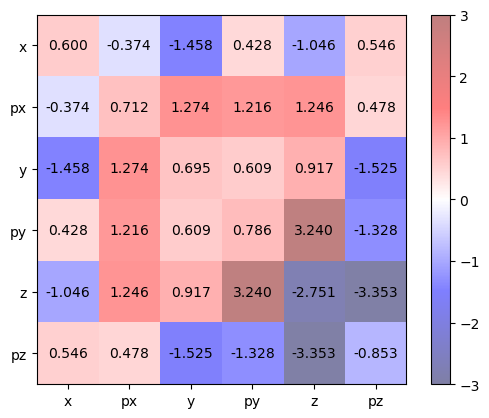

In [10]:
show_cov_stats(pars, gt, beam_fraction=0.5)

ground truth: 
[[ 1.65e+01 -4.60e+00  6.82e-03 -7.96e+00 -8.06e-01 -9.31e+00]
 [-4.60e+00  5.31e+00 -7.95e+00  3.93e-03  8.97e-01  1.03e+01]
 [ 6.82e-03 -7.95e+00  1.65e+01  4.58e+00 -1.40e+00 -1.61e+01]
 [-7.96e+00  3.93e-03  4.58e+00  5.31e+00 -7.37e-04  4.19e-03]
 [-8.06e-01  8.97e-01 -1.40e+00 -7.37e-04  8.39e-01  9.67e+00]
 [-9.31e+00  1.03e+01 -1.61e+01  4.19e-03  9.67e+00  1.31e+02]]

reconstruction avg: 
[[ 16.27  -4.53  -2.57  -7.33  -1.45  -3.79]
 [ -4.53   5.25  -4.69   0.54   1.09  13.12]
 [ -2.57  -4.69  16.07   4.48  -0.63 -31.02]
 [ -7.33   0.54   4.48   5.27   0.7   -3.91]
 [ -1.45   1.09  -0.63   0.7    0.53   2.63]
 [ -3.79  13.12 -31.02  -3.91   2.63  81.54]]

reconstruction std: 
[[ 0.43  0.21  1.81  0.53  0.64  9.71]
 [ 0.21  0.14  2.36  0.43  0.2   6.  ]
 [ 1.81  2.36  0.61  0.26  0.8   9.09]
 [ 0.53  0.43  0.26  0.17  0.21  2.59]
 [ 0.64  0.2   0.8   0.21  0.08  1.86]
 [ 9.71  6.    9.09  2.59  1.86 42.86]]

reconstruction relative uncertainty: 
[[ 0.03 -0.05 -0.

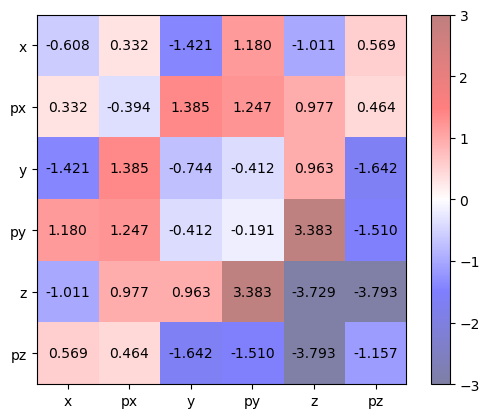

In [11]:
show_cov_stats(pars, gt, beam_fraction=0.95)

ground truth: 
[[ 18.01  -5.01   0.01  -8.67  -0.88 -10.13]
 [ -5.01   5.78  -8.66   0.01   0.98  11.25]
 [  0.01  -8.66  17.99   4.99  -1.52 -17.54]
 [ -8.67   0.01   4.99   5.78  -0.     0.  ]
 [ -0.88   0.98  -1.52  -0.     0.91  10.53]
 [-10.13  11.25 -17.54   0.    10.53 142.65]]

reconstruction avg: 
[[ 17.42  -4.89  -2.65  -7.84  -1.56  -4.23]
 [ -4.89   5.66  -5.09   0.58   1.17  14.2 ]
 [ -2.65  -5.09  17.04   4.71  -0.7  -33.09]
 [ -7.84   0.58   4.71   5.63   0.75  -4.04]
 [ -1.56   1.17  -0.7    0.75   0.56   2.85]
 [ -4.23  14.2  -33.09  -4.04   2.85  87.04]]

reconstruction std: 
[[ 0.37  0.19  2.01  0.53  0.67 10.59]
 [ 0.19  0.13  2.53  0.44  0.21  6.45]
 [ 2.01  2.53  0.57  0.25  0.84  9.53]
 [ 0.53  0.44  0.25  0.13  0.22  2.67]
 [ 0.67  0.21  0.84  0.22  0.08  1.97]
 [10.59  6.45  9.53  2.67  1.97 45.69]]

reconstruction relative uncertainty: 
[[ 0.02 -0.04 -0.76 -0.07 -0.43 -2.5 ]
 [-0.04  0.02 -0.5   0.77  0.18  0.45]
 [-0.76 -0.5   0.03  0.05 -1.21 -0.29]
 [-0.07 

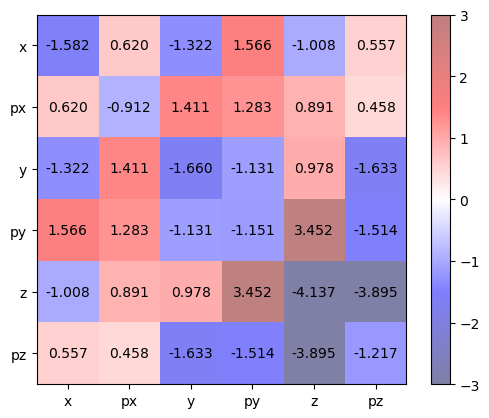

In [12]:
np.set_printoptions(precision=2, suppress=True)
show_cov_stats(pars, gt, beam_fraction=1.0)